In [1]:
!pip install umap-learn
!pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 18.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 20.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Supervised machine learning, Linear Logistic regression KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
clean_ad = pd.read_csv('clean_ad.csv')

clean_ad

,Unnamed: 0,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,17,56.0,Female,Tablet,Bottom,News,0,1
1,25,43.0,Male,Tablet,Bottom,Education,1,1
2,33,37.0,Male,Mobile,Top,News,2,0
3,52,49.0,Male,Mobile,Top,News,0,1
4,102,59.0,Female,Desktop,Bottom,Social Media,0,0
...,...,...,...,...,...,...,...,...
435,9904,20.0,Male,Desktop,Bottom,Shopping,3,0
436,9926,43.0,Non-Binary,Mobile,Side,Entertainment,3,1
437,9928,43.0,Non-Binary,Mobile,Top,Social Media,0,0
438,9960,64.0,Non-Binary,Desktop,Top,Entertainment,0,0


In [3]:
clean_ad.dtypes

Unnamed: 0            int64
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day           int64
click                 int64
dtype: object

In [4]:
clean_ad.head()

,Unnamed: 0,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,17,56.0,Female,Tablet,Bottom,News,0,1
1,25,43.0,Male,Tablet,Bottom,Education,1,1
2,33,37.0,Male,Mobile,Top,News,2,0
3,52,49.0,Male,Mobile,Top,News,0,1
4,102,59.0,Female,Desktop,Bottom,Social Media,0,0


In [5]:
clean_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        440 non-null    int64  
 1   age               440 non-null    float64
 2   gender            440 non-null    object 
 3   device_type       440 non-null    object 
 4   ad_position       440 non-null    object 
 5   browsing_history  440 non-null    object 
 6   time_of_day       440 non-null    int64  
 7   click             440 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 27.6+ KB


<hr>

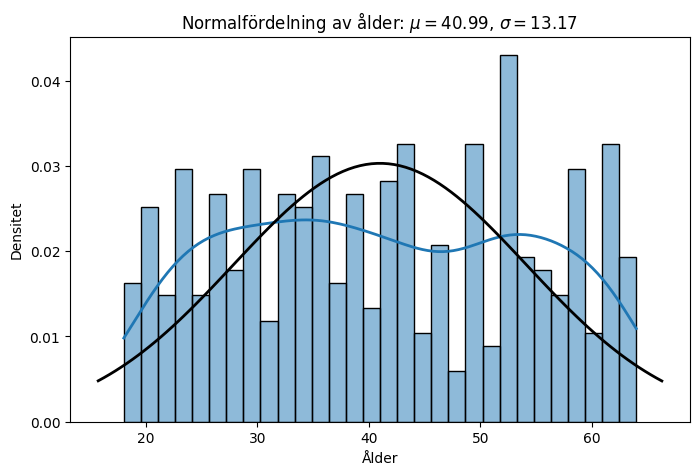

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Plotta histogram och överlagra en normalfördelningskurva för 'age'
plt.figure(figsize=(8, 5))
sns.histplot(clean_ad['age'], bins=30, kde=True, stat="density", line_kws={"linewidth": 2})

# Lägg till en normalfördelningskurva
mu, std = norm.fit(clean_ad['age'])  # Beräkna medelvärde och standardavvikelse
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f'Normalfördelning av ålder: $\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel('Ålder')
plt.ylabel('Densitet')
plt.show()


In [7]:
print(clean_ad.describe())

        Unnamed: 0         age  time_of_day       click
count   440.000000  440.000000   440.000000  440.000000
mean   4136.788636   40.988636     1.554545    0.318182
std    2885.312113   13.184942     1.128115    0.466301
min      17.000000   18.000000     0.000000    0.000000
25%    1585.000000   29.750000     1.000000    0.000000
50%    3744.500000   40.500000     2.000000    0.000000
75%    6323.750000   53.000000     3.000000    1.000000
max    9999.000000   64.000000     3.000000    1.000000


In [8]:
from scipy.stats import shapiro

# Shapiro-Wilk-test för ålder
stat, p = shapiro(clean_ad['age'])

# Resultat
print(f'Statistik={stat}, p-värde={p}')
if p > 0.05:
    print('Datan är normalfördelad (kan anses vara parametrisk)')
else:
    print('Datan är inte normalfördelad (icke-parametrisk)')


Statistik=0.9557009339332581, p-värde=3.173004636813914e-10
Datan är inte normalfördelad (icke-parametrisk)


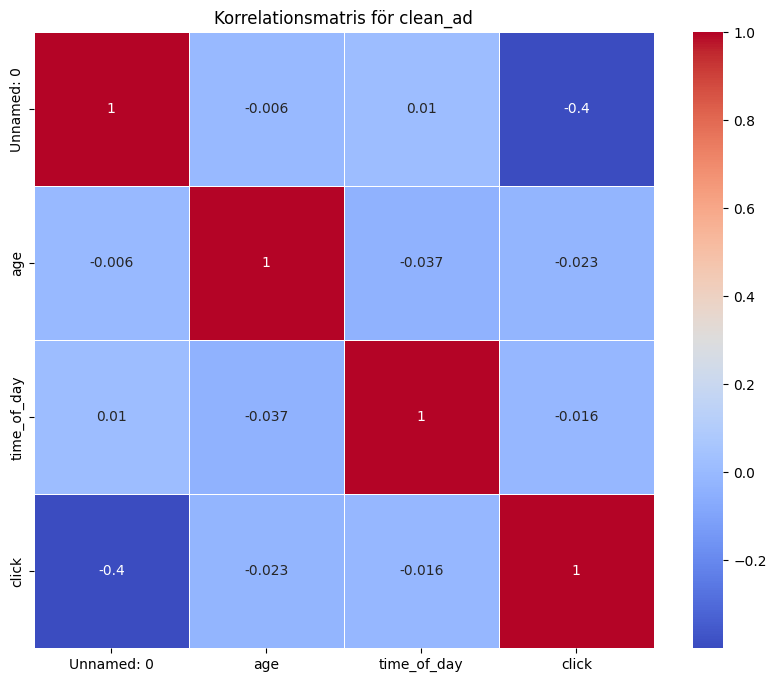

In [9]:
# Generera korrelationsmatrisen
corr_matrix = clean_ad.corr(numeric_only=True)

# Visualisera korrelationsmatrisen med en heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Lägg till titlar
plt.title('Korrelationsmatris för clean_ad')
plt.show()

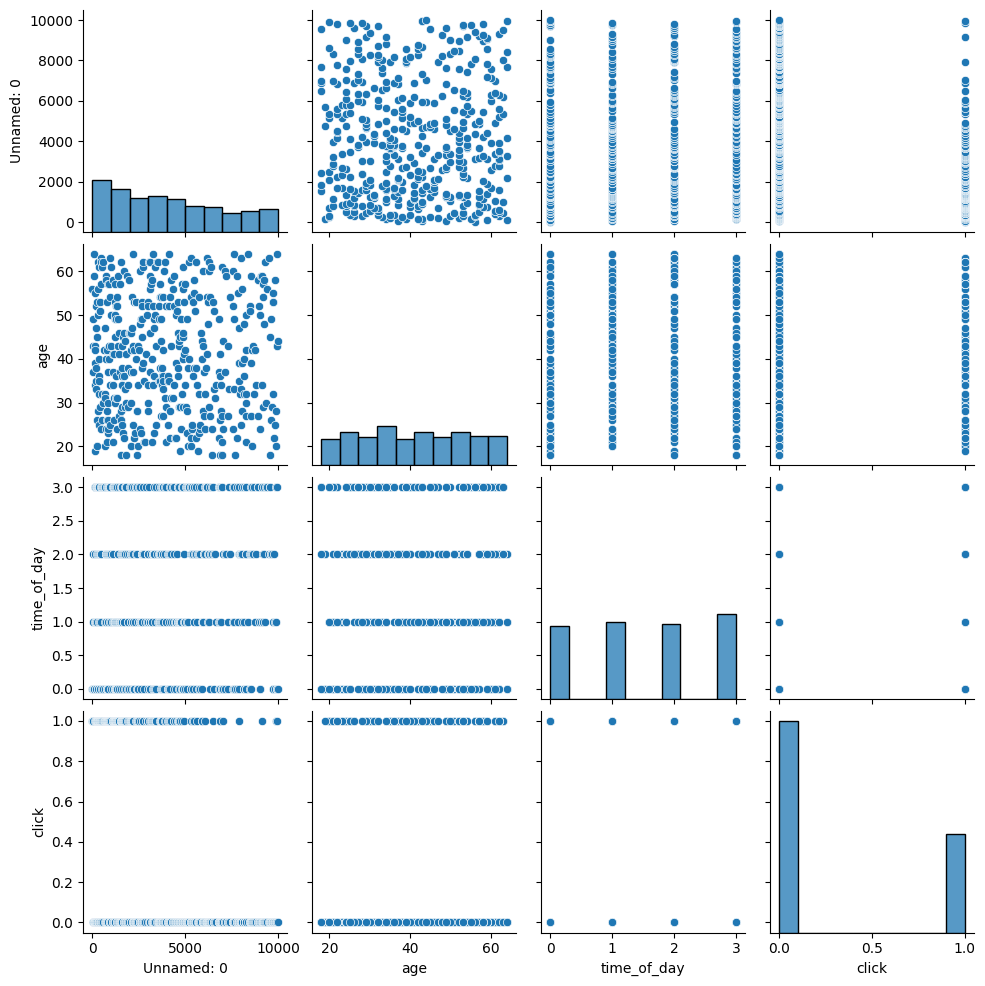

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa en pairplot för alla numeriska variabler i datasetet
sns.pairplot(clean_ad)
plt.show()

In [11]:
# Identifiera vilka kolumner som är av kategorisk typ
categorical_columns = clean_ad.select_dtypes(include=['object']).columns

# Använd pd.get_dummies för att one-hot enkoda de kategoriska kolumnerna
df_encoded = pd.get_dummies(clean_ad, columns=categorical_columns, drop_first=True)

# Visa de första raderna av den kodade dataframen
print(df_encoded.head())

   Unnamed: 0   age  time_of_day  click  gender_Male  gender_Non-Binary  \
0          17  56.0            0      1        False              False   
1          25  43.0            1      1         True              False   
2          33  37.0            2      0         True              False   
3          52  49.0            0      1         True              False   
4         102  59.0            0      0        False              False   

   device_type_Mobile  device_type_Tablet  ad_position_Side  ad_position_Top  \
0               False                True             False            False   
1               False                True             False            False   
2                True               False             False             True   
3                True               False             False             True   
4               False               False             False            False   

   browsing_history_Entertainment  browsing_history_News  \
0       

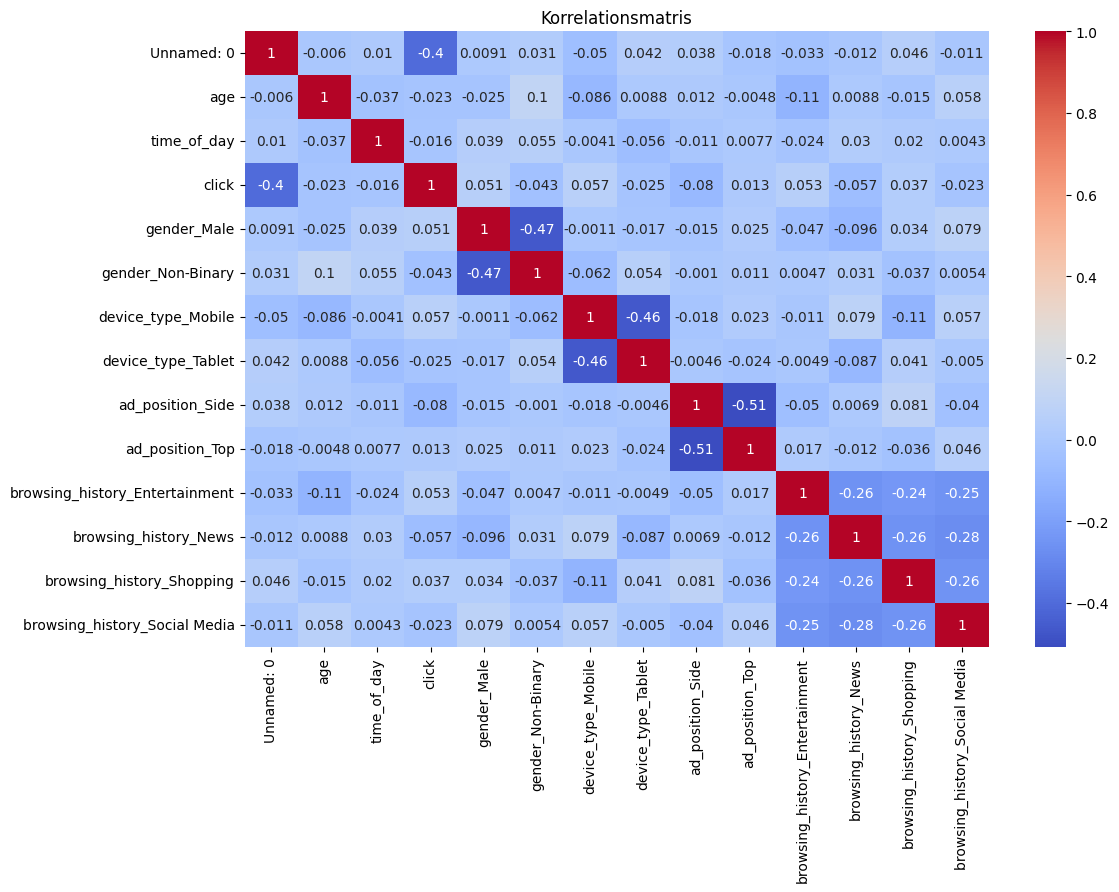

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatris
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatris')
plt.show()


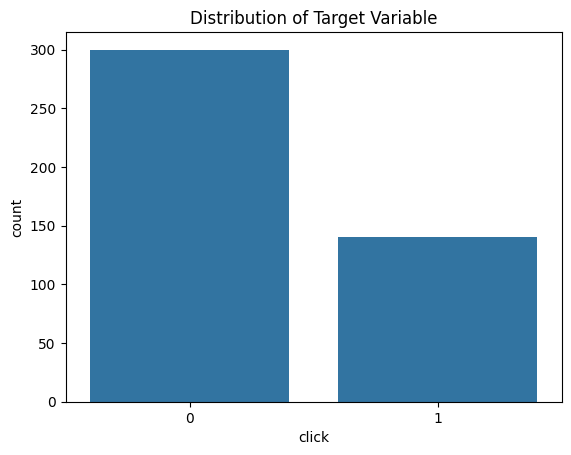

In [13]:
# Plot distribution of the target variable
sns.countplot(x='click', data=df_encoded)
plt.title('Distribution of Target Variable')
plt.show()

click                             1.000000
device_type_Mobile                0.057467
browsing_history_Entertainment    0.053048
gender_Male                       0.050921
browsing_history_Shopping         0.036517
ad_position_Top                   0.013101
time_of_day                      -0.015746
browsing_history_Social Media    -0.022728
age                              -0.023493
device_type_Tablet               -0.024631
gender_Non-Binary                -0.043363
browsing_history_News            -0.057247
ad_position_Side                 -0.080410
Unnamed: 0                       -0.399794
Name: click, dtype: float64


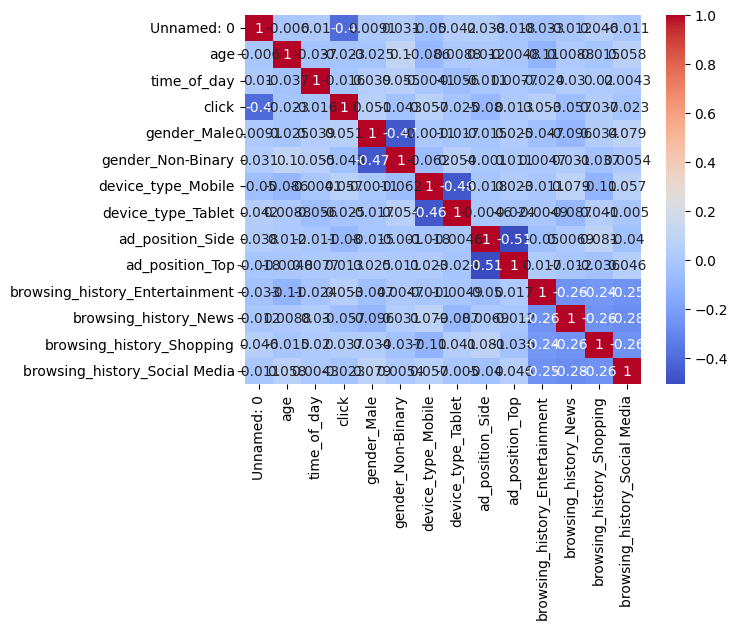

In [14]:
# Correlation with other variables
correlation = df_encoded.corr()['click'].sort_values(ascending=False)
print(correlation)

# Visualize correlation with heatmap
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
print(df_encoded.columns)


Index(['Unnamed: 0', 'age', 'time_of_day', 'click', 'gender_Male',
       'gender_Non-Binary', 'device_type_Mobile', 'device_type_Tablet',
       'ad_position_Side', 'ad_position_Top', 'browsing_history_Entertainment',
       'browsing_history_News', 'browsing_history_Shopping',
       'browsing_history_Social Media'],
      dtype='object')


In [16]:
from sklearn.preprocessing import StandardScaler

# Välj de kolumner som är numeriska och behöver standardiseras
columns_to_standardize = ['age', 'time_of_day']

# Skapa en StandardScaler-instans
scaler = StandardScaler()

# Standardisera de valda kolumnerna
df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])

# Visa de standardiserade värdena
print(df_encoded.head())


   Unnamed: 0       age  time_of_day  click  gender_Male  gender_Non-Binary  \
0          17  1.139819    -1.379571      1        False              False   
1          25  0.152724    -0.492128      1         True              False   
2          33 -0.302859     0.395316      0         True              False   
3          52  0.608306    -1.379571      1         True              False   
4         102  1.367611    -1.379571      0        False              False   

   device_type_Mobile  device_type_Tablet  ad_position_Side  ad_position_Top  \
0               False                True             False            False   
1               False                True             False            False   
2                True               False             False             True   
3                True               False             False             True   
4               False               False             False            False   

   browsing_history_Entertainment  browsing_

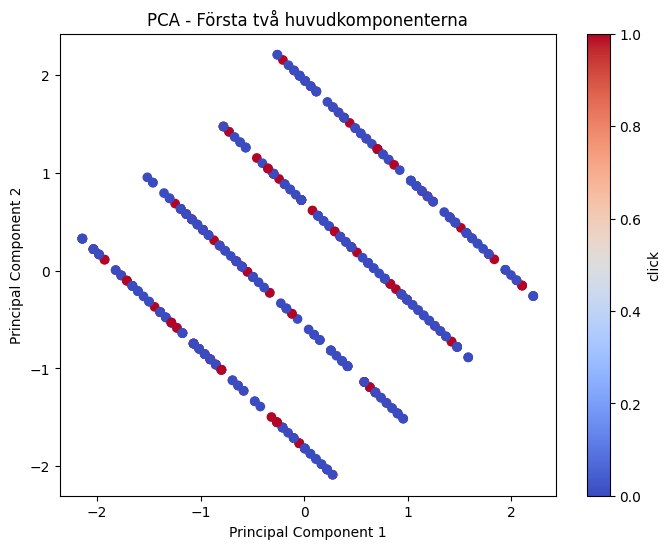

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Välj numeriska kolumner för PCA 
columns_for_pca = ['age', 'time_of_day']

# Skapa en PCA-instans och ange antal komponenter 
pca = PCA(n_components=2)

# Tillämpa PCA på de valda kolumnerna
pca_components = pca.fit_transform(df_encoded[columns_for_pca])

# Skapa en dataframe med PCA-komponenterna
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Visualisera de två första huvudkomponenterna
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_encoded['click'], cmap='coolwarm')
plt.colorbar(label='click')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Första två huvudkomponenterna')
plt.show()


In [18]:
explained_variance = pca.explained_variance_ratio_
print("Förklarad varians för varje komponent:", explained_variance)


Förklarad varians för varje komponent: [0.51870113 0.48129887]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dela upp i träning och test
X_train, X_test, y_train, y_test = train_test_split(df_pca, df_encoded['click'], test_size=0.3, random_state=42)

# Träna en logistisk regressionsmodell
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediktioner
y_pred = log_reg.predict(X_test)

# Utvärdera modellens prestanda
accuracy = accuracy_score(y_test, y_pred)
print(f"Noggrannhet med PCA och logistisk regression: {accuracy}")


Noggrannhet med PCA och logistisk regression: 0.6287878787878788


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Välj de ursprungliga variablerna att använda utan PCA
columns_to_use = ['age', 'time_of_day', 'gender_Male', 'device_type_Mobile', 
                  'ad_position_Top', 'browsing_history_Entertainment']

# Dela in X (oberoende variabler) och y (beroende variabel)
X = df_encoded[columns_to_use]
y = df_encoded['click']

# Standardisera de numeriska kolumnerna
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dela in i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Träna logistisk regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediktioner
y_pred = log_reg.predict(X_test)

# Utvärdera modellens prestanda
accuracy = accuracy_score(y_test, y_pred)
print(f"Noggrannhet med ursprungliga variabler och logistisk regression: {accuracy}")

# Utökad utvärdering med precision, recall och F1-score
print(classification_report(y_test, y_pred))


Noggrannhet med ursprungliga variabler och logistisk regression: 0.6287878787878788
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        83
           1       0.00      0.00      0.00        49

    accuracy                           0.63       132
   macro avg       0.31      0.50      0.39       132
weighted avg       0.40      0.63      0.49       132

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [21]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Välj de ursprungliga variablerna att använda
columns_to_use = ['age', 'time_of_day', 'gender_Male', 'device_type_Mobile', 
                  'ad_position_Top', 'browsing_history_Entertainment']

# Dela in X (oberoende variabler) och y (beroende variabel)
X = df_encoded[columns_to_use]
y = df_encoded['click']

# Standardisera de numeriska kolumnerna
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Använd SMOTE för att balansera klasserna
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dela in i tränings- och testdata efter SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Träna logistisk regression med balanserad data
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train, y_train)

# Prediktioner
y_pred_smote = log_reg_smote.predict(X_test)

# Utvärdera modellens prestanda
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Noggrannhet med SMOTE och logistisk regression: {accuracy_smote}")

# Utökad utvärdering med precision, recall och F1-score
print(classification_report(y_test, y_pred_smote))


Noggrannhet med SMOTE och logistisk regression: 0.5388888888888889
              precision    recall  f1-score   support

           0       0.51      0.63      0.57        86
           1       0.57      0.46      0.51        94

    accuracy                           0.54       180
   macro avg       0.54      0.54      0.54       180
weighted avg       0.55      0.54      0.54       180



In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Skapa interaktionsvariabler
df_encoded['device_time_interaction'] = df_encoded['device_type_Mobile'] * df_encoded['time_of_day']
df_encoded['gender_shopping_interaction'] = df_encoded['gender_Male'] * df_encoded['browsing_history_Shopping']

# Välj ursprungliga och interaktionsvariabler för modelleringen
columns_to_use = ['age', 'time_of_day', 'gender_Male', 'device_type_Mobile', 
                  'ad_position_Top', 'browsing_history_Entertainment', 
                  'device_time_interaction', 'gender_shopping_interaction']
X = df_encoded[columns_to_use]
y = df_encoded['click']

# Standardisera data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dela data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Träna logistisk regressionsmodell
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Gör prediktioner
y_pred = log_reg.predict(X_test)

# Utvärdera modellens prestanda
accuracy = accuracy_score(y_test, y_pred)
print(f"Noggrannhet med interaktionsvariabler och logistisk regression: {accuracy}")

# Utökad utvärdering med precision, recall och F1-score
print(classification_report(y_test, y_pred))


Noggrannhet med interaktionsvariabler och logistisk regression: 0.6287878787878788
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        83
           1       0.00      0.00      0.00        49

    accuracy                           0.63       132
   macro avg       0.31      0.50      0.39       132
weighted avg       0.40      0.63      0.49       132

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abfcac72-e500-4803-a5e4-0c8987b7c3f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>